<p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold"><br>

Machine Learning from Disaster<br><br> Predict survival on the Titanic 

<br><br></p>

<p style="font-size:1.25em">This notebook was done as a part of Cadent Data Science python coding benchmark. <br> <br>
The data was obtained from <a href="https://www.kaggle.com/c/titanic">Kaggle</a> <br><br>

The objective for this project is to predict survival using the Titanic Dataset </p>


<p style="font-size:1.25em">From a western perspective, the Titanic sinking is famous disaster and the machine learning problem behind it. <br><br> </p>


<p style="font-size:1.05em">The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, the Titanic sank on her maiden voyage after colliding with an iceberg, killing 1,502 out of 2,224 passengers and crew. This tragedy shocked the international community and led to improved safety regulations.

<br><br>

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. </p>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/St%C3%B6wer_Titanic.jpg/350px-St%C3%B6wer_Titanic.jpg" height="200px" width="800px">

<p style="font-size:1.25em">
I did a background search on this disaster to to familiarize myself with this data set. From what I found, the Titanic could carry a total of 3547 people, but at the time of the disaster, it only had 2224 people onboard. Which means that it was not even at its full capacity. However, the Titanic's lifeboat system was designed to ferry passengers to nearby rescue vessels, not to hold everyone onboard at once. There were a total of 18 lifeboats on Titatnic's upperdecks, but records show due to poor management some lifeboats left without filling to full capacity. 

<br><br>

After the initial collision with the iceberg, it took two hours and forty minutes until it completely sank. The crew of the Titanic sent wireless messages asking for help but all nearby vessels were hours away. The Titanic was on its maiden voyage and some records show that the crew who was working on the Titanic didn't have the proper disaster management training. Also Titanic did receive the warning about ice fields before hand but at the time of the collision it was cruising at its full speed. 

<br><br>

In summary, the lack of lifeboats, poor disaster management, and poor decision making cost 1,502 lives and completely change the maritime regulations.  </p>

<img src="http://storage.edmontonsun.com/v1/suns-prod-images/1297252423477_ORIGINAL.jpg?quality=80" height="200px" width="800px">

<p style="font-size:1.25em">

The Impact point of the collision was the front right side of the ship, which is also known as the starboard. The impact, buckled the starboard which resulted in opening 5 of 6 compartments to the sea. Titanic had been designed to stay afloat with four of her forward compartments flooded but no more.

<br><br>

All 18 life boats of the ship were in the upper deck and 1st class passenger compartments were the closest to the upper deck. As a result, the 1st class passengers were in closer proximity to the life boats compared to 2nd and 3rd class passengers. This could have contributed to greater odds at surviving. </p>

<img src="http://www.ssmaritime.com/Titanic-Deck-Plan.jpg" height="200px" width="800px">



<p style="font-size:1.25em">

The figure above shows the floor plan on each deck and there were 7 in total. </p>

## Table of Content


* ### Introduction 
    * Import Libraries 
    * Load Data <br>
    * Identify Missing Values <br>
    * Run Statistical Summeries <br>
    * Pearson Correlation with Target Variable <br>
* ### Missing Values Imputation
    * Train Data Missing Columns- Embarked <br>
    * Test Data Missing Columns- Fare <br>
    * Expectation Maximization for Age
    * Distribution Correlation for Fare
* ### Feature Engineering 
    * Create the Family Feature <br>
    * Create a Title Feature <br>
    * Create Name Length <br>
    * Create Ticket Numbers <br>
    * Create Bins using Name Length <br>
    * Data Scaling <br>
    * Convert Categorical Data into Numerical Values <br>
    * Create Dummy Variables <br>
* ### Prediction 
    * Load Modules for Prediction <br>
    * Split Data into Training and Testing <br>
    * Create the Estimators and the Pipeline <br>
    * Set the Parameter Grid for Hyperparameter Tuning <br>
    * Fit the Data to Models in the Pipeline <br>
    * Best Estimator and Hyperparameters <br>
    * Prediction for Validation <br>
    * Nested Score with Cross Validation <br>
    * Precision - Recall Curve <br>

### 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# set env
%matplotlib inline
sns.set_style( 'white' )

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

### 1.2 Load Data

In [2]:
train = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# the test data set has 1 less column 
# the missing column is survival which will be out prediction
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
# Get detail information about the data set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.3 Identify Missing Values

In [8]:
# Get detail information about each column count 
train.info()
print("--------------------------------------------------")
test.info()
# In Age, Cabin and Embarked has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

In [9]:
# Calculate the missing values in each column in both testing and training
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_test = test.isnull().sum().sort_values(ascending=False)
missing_values = pd.concat([missing_train,missing_test], axis=1, keys=["Train","Test"])
missing_values

,Train,Test
Age,177,86.0
Cabin,687,327.0
Embarked,2,0.0
Fare,0,1.0
Name,0,0.0
Parch,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0


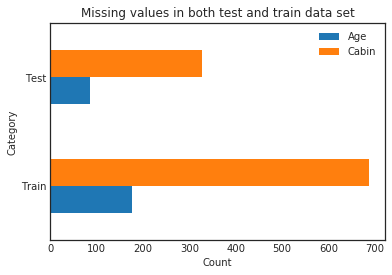

In [10]:
# Age and Cabin has the highest missing values
missing_count = pd.concat([missing_values.loc["Age"],missing_values.loc["Cabin"]],axis=1)
ax = missing_count.plot(kind='barh',title="Missing values in both test and train data set",legend=True)
ax.set_xlabel("Count")
ax.set_ylabel("Category")

### 1.4 Run Statistical Summaries

In [11]:
# From the training data we want to know the propotion of people survived compared to all people onboard 

survived = train.loc[train["Survived"] == 1]
not_survived = train.loc[train["Survived"] == 0]
survival_ratio_in_train = len(survived)/(len(not_survived)+len(survived))

# this ratio could be useful if we have to split out train data in futher steps
survival_ratio_in_train

0.3838383838383838

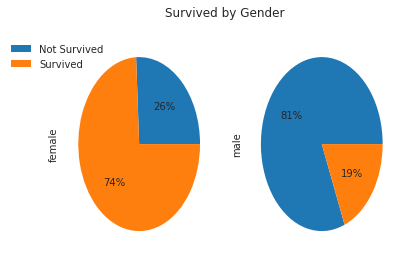

In [12]:
# Survived by Gender

survived_by_gender = pd.crosstab(train["Survived"],train["Sex"])
ax1,ax2 = survived_by_gender.plot(kind='pie',title="Survived by Gender",legend=True,subplots=True, autopct='%1.0f%%',labels=None)

ax1.legend(['Not Survived', 'Survived'],loc='upper left',bbox_to_anchor=(-0.4, 1.))

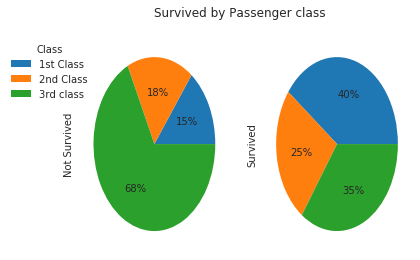

In [13]:
# Survived by Class

survived_by_class = pd.crosstab(train["Pclass"],train["Survived"])
survived_by_class.columns = ['Not Survived','Survived']
ax1,ax2 = survived_by_class.plot(kind='pie',title="Survived by Passenger class",subplots=True,labels=None, autopct='%1.0f%%')

ax1.legend(['1st Class', '2nd Class','3rd class'],title="Class",loc='upper left',bbox_to_anchor=(-0.5, 1.))

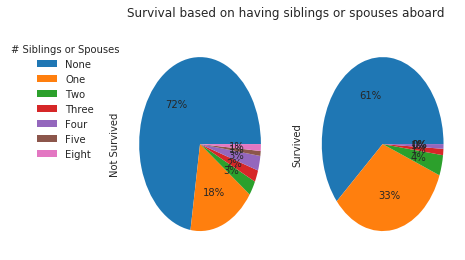

In [14]:
# Survived by siblins or Spouse aborad

survived_by_sibsp = pd.crosstab(train['SibSp'],train['Survived'])
survived_by_sibsp.columns = ['Not Survived','Survived']

ax1,ax2 = survived_by_sibsp.plot(kind='pie', title='Survival based on having siblings or spouses aboard',subplots=True,labels=None, autopct='%1.0f%%')

ax1.legend(['None', 'One', 'Two', 'Three', 'Four', 'Five', 'Eight'], title = "# Siblings or Spouses", loc='upper left',bbox_to_anchor=(-0.8, 1.))

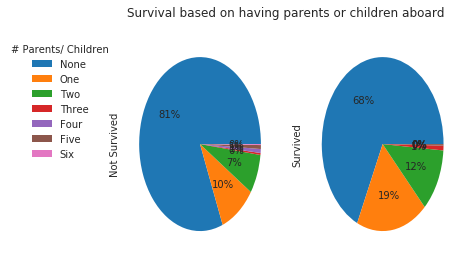

In [15]:
# Survived by Parents or children aborad

survived_by_parch = pd.crosstab(train['Parch'],train['Survived'])
survived_by_parch.columns = ['Not Survived','Survived']

ax1,ax2 = survived_by_parch.plot(kind='pie', title='Survival based on having parents or children aboard',subplots=True,labels=None, autopct='%1.0f%%')

ax1.legend(['None', 'One', 'Two', 'Three', 'Four', 'Five', 'Six'],title="# Parents/ Children", loc='upper left',bbox_to_anchor=(-0.8, 1.))

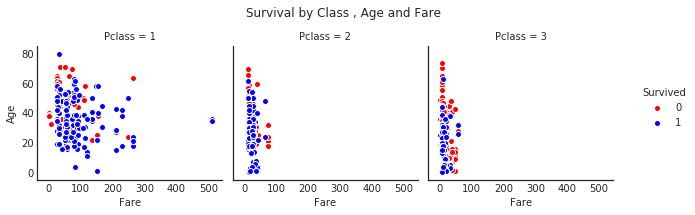

In [16]:
# Survived by Class, Far and Age

g = sns.FacetGrid(train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"blue", 0:"red"})
g = g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Class , Age and Fare');

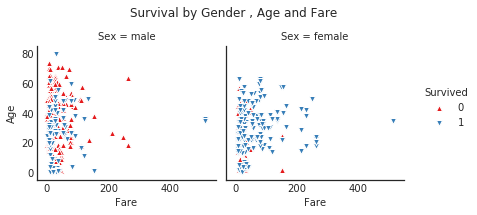

In [17]:
# Survived by Age and Fare

g = sns.FacetGrid(train, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

In [18]:
# On its journey from Southhampton to NY, Titanic made 3 stops 
# This embarked locations stands for those stops
# S = SounthHampton
# C = Cherbourg
# Q = Queenstown

train.loc[train["Embarked"] == "S", "Embarked"] = "Southhampton"
train.loc[train["Embarked"] == "C", "Embarked"] = "Cherbourg"
train.loc[train["Embarked"] == "Q", "Embarked"] = "Queenstown"

test.loc[test["Embarked"] == "S", "Embarked"] = "Southhampton"
test.loc[test["Embarked"] == "C", "Embarked"] = "Cherbourg"
test.loc[test["Embarked"] == "Q", "Embarked"] = "Queenstown"

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton


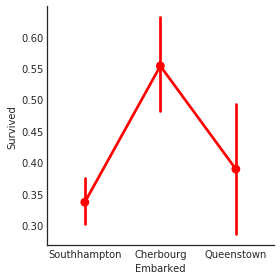

In [20]:
# Let set the Embarked value to the original values
sns.factorplot(x ='Embarked', y="Survived", data=train, color="r")

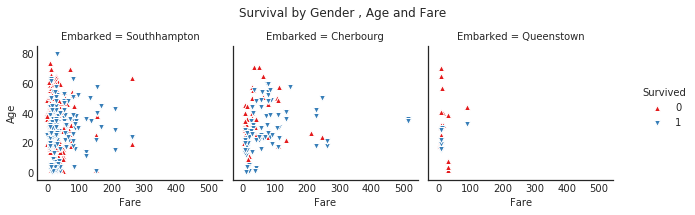

In [21]:
# survived by Fare and Age based on Embarked

g = sns.FacetGrid(train, hue="Survived", col="Embarked", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

In [22]:
# To calculate the Pesrson Coeff, let's make Survival as the 1st column

cols = train.columns.tolist()
cols[0],cols[1] = cols[1], cols[0]
recol_train = train[cols]
recol_train.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton


### 1.5 Pearson Correlation with Target Variable 

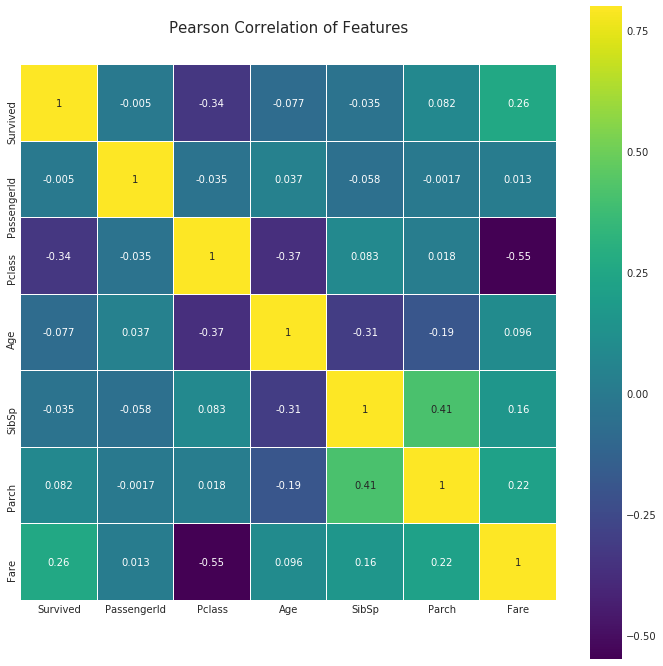

In [23]:
colormap = plt.cm.viridis
corr = recol_train.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap=colormap,linecolor="white")
plt.title('Pearson Correlation of Features', y=1.05, size=15)

## 2.0 Missing Value Imputation

### 2.1 Train Data Missing Values in Column Embarked

In [24]:
train[train["Embarked"].isnull()]
# both passengers 61 and 829 don't have embark value
# however both of them are survived and in class 1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


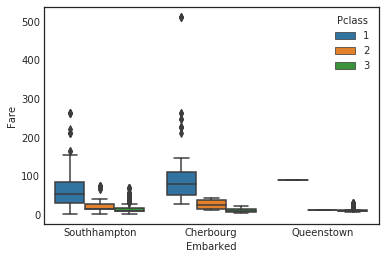

In [25]:
# plot the fare vs embark values for all the classes
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train)
# embarked 'C' has median value of close to $80 and for 1st class

In [26]:
# Cherbourg has a Fare closer to 80

train["Embarked"] = train["Embarked"].fillna('Cherbourg')

### 2.2 Test Data Missing Values in Columns Fare 

In [27]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,Southhampton


In [28]:
# This passenger is in class 3, Embarked from 'Southhampton'
# We'll take the median value for that category and repalce for the missing value
median_fair = test[(test["Pclass"] == 3) & (test["Embarked"] == "Southhampton")]['Fare'].median()
test["Fare"] = test["Fare"].fillna(median_fair)

In [29]:
# Calculate the missing values in each column in both testing and training
missing_train = train.isnull().sum().sort_values(ascending=False)
missing_test = test.isnull().sum().sort_values(ascending=False)
missing_values = pd.concat([missing_train,missing_test], axis=1, keys=["Train","Test"])
missing_values

,Train,Test
Age,177,86.0
Cabin,687,327.0
Embarked,0,0.0
Fare,0,0.0
Name,0,0.0
Parch,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0


### 1.3 Expectation Maximization

(array([ 0.01347062,  0.01250843,  0.00673531,  0.01347062,  0.00481094,
         0.00577312,  0.00481094,  0.0076975 ,  0.00288656,  0.00865968,
         0.00481094,  0.01058406,  0.01058406,  0.02309249,  0.01731937,
         0.05773123,  0.01924374,  0.02790343,  0.0298278 ,  0.02309249,
         0.03656311,  0.04810936,  0.02405468,  0.02790343,  0.02405468,
         0.02886561,  0.01828156,  0.03656311,  0.01731937,  0.0221303 ,
         0.02790343,  0.00962187,  0.01347062,  0.03078999,  0.01443281,
         0.01731937,  0.00865968,  0.00962187,  0.01539499,  0.01154625,
         0.01154625,  0.00865968,  0.01058406,  0.00962187,  0.00673531,
         0.00865968,  0.00192437,  0.00673531,  0.00384875,  0.00577312,
         0.00384875,  0.0076975 ,  0.00384875,  0.00384875,  0.00288656,
         0.00384875,  0.00096219,  0.        ,  0.        ,  0.00192437,
         0.00288656,  0.        ,  0.        ,  0.00096219,  0.00096219,
         0.        ,  0.        ,  0.        ,  0.0

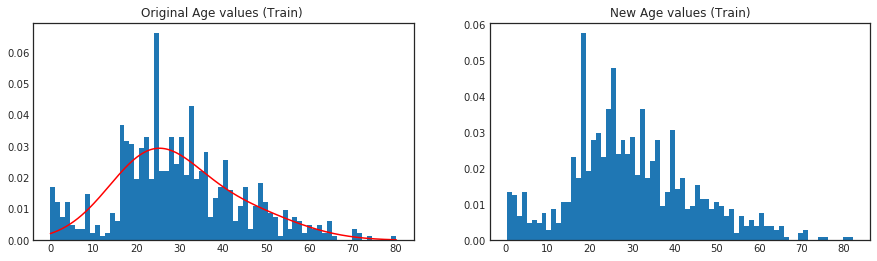

In [30]:
from sklearn import mixture

# lets use Expectation maximization to fil the age imputation
# sklearn implements the EM algorithm with GMM

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values (Train) ')
axis2.set_title('New Age values (Train)')

null_values = train['Age'].dropna().astype(int)
axis1.hist(null_values,70,normed=True)

X = train['Age'].dropna()
X = X.values.reshape(-1,1)

clf = mixture.GaussianMixture(n_components=2).fit(X) # fit 2 gaussians 

Y1 = train['Age'].isnull().sum()
Y2 = test['Age'].isnull().sum()

xpdf1 = np.linspace(0,80,Y1)
xpdf1 = xpdf1.reshape(-1,1)
xpdf2 = np.linspace(0,80,Y2)
xpdf2 = xpdf2.reshape(-1,1)


density1 = np.exp(clf.score_samples(xpdf1))
axis1.plot(xpdf1,density1,'-r')

x1,y1 = clf.sample(Y1)
x2,y2 = clf.sample(Y2)

train['Age'][np.isnan(train['Age'])] = np.absolute(x1)
test['Age'][np.isnan(test['Age'])] = np.absolute(x2)

axis2.hist(train['Age'],70,normed=True)

# in the figure below we can see that the density fucntion is a good 
# approximate for the data
# We use this gmm to miss the missing values

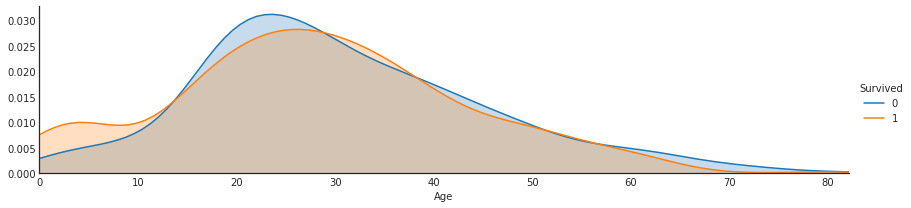

In [31]:
# Age Distribution

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

In [32]:
train.corr()["Age"]
# train.corr()['Deck']

PassengerId    0.134725
Survived      -0.080431
Pclass        -0.282289
Age            1.000000
SibSp         -0.209442
Parch         -0.155752
Fare           0.068893
Name: Age, dtype: float64

### 1.4 Distribution Correlation for Fare

In [34]:
train['Deck'] = train.Cabin.str[0]
test['Deck'] = test.Cabin.str[0]
train['Deck'].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

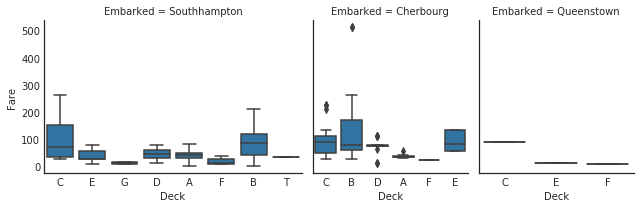

In [35]:
# Deck distribution with Fare and Embarked

train = train.assign(Deck=train.Deck.astype(object))
g = sns.FacetGrid(train, col="Embarked", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Deck", "Fare");

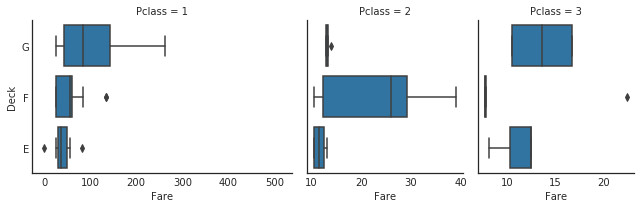

In [36]:
# Which class were in which Decks

train = train.assign(Deck=train.Deck.astype(object))
g = sns.FacetGrid(train, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Fare", "Deck");

In [37]:
# mean Fare for each class

first_class_price = train[(train["Pclass"] == 1)]['Fare'].mean()
print("First class price: $%s" % first_class_price) #lets say USD

second_class_price = train[(train["Pclass"] == 2)]['Fare'].mean()
print("Second class price: $%s" % second_class_price) #lets say USD

thrid_class_price = train[(train["Pclass"] == 3)]['Fare'].mean()
print("Thrid class price: $%s" % thrid_class_price) #lets say USD

First class price: $84.15468749999992
Second class price: $20.66218315217391
Thrid class price: $13.675550101832997


In [38]:
# 1st class decks
first_class_decks =  train.loc[(train["Pclass"] == 1), 'Deck'].unique()
first_class_decks

array(['C', 'E', 'A', nan, 'B', 'D', 'T'], dtype=object)

In [39]:
# 2nd class decks
second_class_decks =  train.loc[(train["Pclass"] == 2), 'Deck'].unique()
second_class_decks

array([nan, 'D', 'F', 'E'], dtype=object)

In [40]:
# 3rd class decks
third_class_decks =  train.loc[(train["Pclass"] == 3), 'Deck'].unique()
third_class_decks

array([nan, 'G', 'F', 'E'], dtype=object)

In [41]:
# Assigm decks based on the class

train.loc[(train['Deck'].isnull()) & (train['Pclass'] == 1), 'Deck'] = 'A'
train.loc[(train['Deck'].isnull()) & (train['Pclass'] == 2), 'Deck'] = 'D'
train.loc[(train['Deck'].isnull()) & (train['Pclass'] == 3), 'Deck'] = 'G'

test.loc[(test['Deck'].isnull()) & (test['Pclass'] == 1), 'Deck'] = 'A'
test.loc[(test['Deck'].isnull()) & (test['Pclass'] == 2), 'Deck'] = 'D'
test.loc[(test['Deck'].isnull()) & (test['Pclass'] == 3), 'Deck'] = 'G'

train.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [42]:
# Calculate the missing values in each column in both testing and training

missing_train = train.isnull().sum().sort_values(ascending=False)
missing_test = test.isnull().sum().sort_values(ascending=False)
missing_values = pd.concat([missing_train,missing_test], axis=1, keys=["Train","Test"])
missing_values

# No missing values

,Train,Test
Age,0,0.0
Deck,0,0.0
Embarked,0,0.0
Fare,0,0.0
Name,0,0.0
Parch,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0


# 3.0 Feature Engineering

### 3.1 Create the Family Feature

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southhampton,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southhampton,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southhampton,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southhampton,G


In [44]:
# Family If there is parents, siblings or spouse onboard 
train['Family'] = train['Parch'] + train['SibSp']
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0

test['Family'] = test['Parch'] + test['SibSp']
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southhampton,G,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southhampton,G,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southhampton,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southhampton,G,0


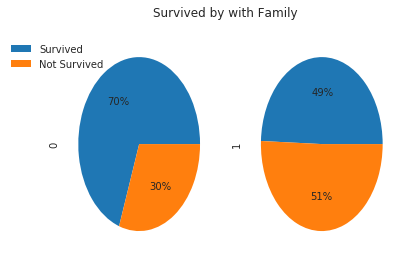

In [46]:
# Survival by Family 

survived_by_family = pd.crosstab(train["Survived"],train["Family"])
ax1,ax2 = survived_by_family.plot(kind='pie',title="Survived by with Family",legend=True,subplots=True, autopct='%1.0f%%',labels=None)

ax1.legend(['Survived', 'Not Survived'],loc='upper left',bbox_to_anchor=(-0.4, 1.))

In [47]:
# Having a family could wither be in SibSp or Parch
# So we can drop those 2 columns
train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Deck,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,Southhampton,G,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,Cherbourg,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,Southhampton,G,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,Southhampton,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,Southhampton,G,0


### 3.2 Create a Title Feature

In [49]:
import re

train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Titles
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [50]:
def replaceRateTitle(df):
    rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
    df.loc[df["Title"] == "Mlle", "Title"] = 'Miss'
    df.loc[df["Title"] == "Ms", "Title"] = 'Miss'
    df.loc[df["Title"] == "Mme", "Title"] = 'Mrs'
    df.loc[df["Title"] == "Dona", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Lady", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Countess", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Capt", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Col", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Don", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Major", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Rev", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Sir", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Jonkheer", "Title"] = 'Rare Title'
    df.loc[df["Title"] == "Dr", "Title"] = 'Rare Title'
    
    return df    

In [51]:
train = replaceRateTitle(train)
train["Title"].value_counts()

Mr            517
Miss          185
Mrs           126
Master         40
Rare Title     23
Name: Title, dtype: int64

In [52]:
test = replaceRateTitle(test)
test['Title'].value_counts()

Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Title, dtype: int64

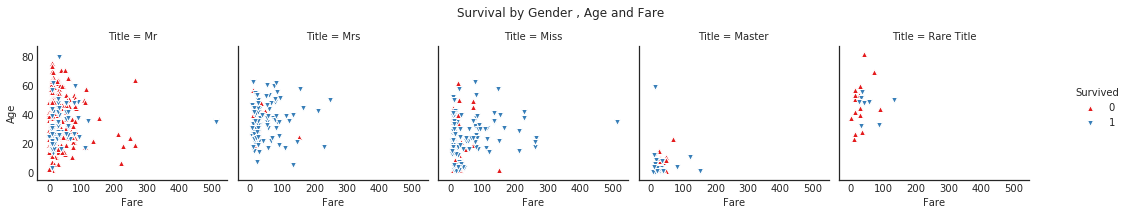

In [55]:
g = sns.FacetGrid(train, hue="Survived", col="Title", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

In [56]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Deck,Family,Title,Name_Length
0,1,0,3,male,22.0,A/5 21171,7.2500,Southhampton,G,1,Mr,23
1,2,1,1,female,38.0,PC 17599,71.2833,Cherbourg,C,1,Mrs,51
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,Southhampton,G,0,Miss,22
3,4,1,1,female,35.0,113803,53.1000,Southhampton,C,1,Mrs,44
4,5,0,3,male,35.0,373450,8.0500,Southhampton,G,0,Mr,24


### 3.3 Create Name Length

In [57]:
# Name Length
train['Name_Length'] = train['Name'].apply(len)
test['Name_Length'] = test['Name'].apply(len)

train.drop(['Name'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)

KeyError: 'Name'

### 3.4 Create Ticket Numbers

In [58]:
# Create ticket numbers

train["TicketNumber"] = train["Ticket"].str.extract('(\d{2,})', expand=True)
train["TicketNumber"] = train["TicketNumber"].apply(pd.to_numeric)

test["TicketNumber"] = test["Ticket"].str.extract('(\d{2,})', expand=True)
test["TicketNumber"] = test["TicketNumber"].apply(pd.to_numeric)

train.TicketNumber.fillna(train["TicketNumber"].median(), inplace=True)
test.TicketNumber.fillna(test["TicketNumber"].median(), inplace=True)

train.drop(['Ticket','PassengerId'],axis=1,inplace=True)
test.drop(['Ticket','PassengerId'],axis=1,inplace=True)

In [59]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Family,Title,Name_Length,TicketNumber
0,0,3,male,22.0,7.2500,Southhampton,G,1,Mr,23,21171.0
1,1,1,female,38.0,71.2833,Cherbourg,C,1,Mrs,51,17599.0
2,1,3,female,26.0,7.9250,Southhampton,G,0,Miss,22,3101282.0
3,1,1,female,35.0,53.1000,Southhampton,C,1,Mrs,44,113803.0
4,0,3,male,35.0,8.0500,Southhampton,G,0,Mr,24,373450.0


In [60]:
train.corr()["TicketNumber"]
# the only correlation is with the class

Survived       -0.096161
Pclass          0.284631
Age            -0.077578
Fare           -0.156104
Family         -0.037374
Name_Length    -0.050760
TicketNumber    1.000000
Name: TicketNumber, dtype: float64

In [61]:
first_class_tickets =  train.loc[(train["Pclass"] == 1), 'TicketNumber'].unique()
print("Number of unique 1st class tickets", len(first_class_tickets))

second_class_tickets =  train.loc[(train["Pclass"] == 2), 'TicketNumber'].unique()
print("Number of unique 2nd class tickets", len(second_class_tickets))

thrid_class_tickets =  train.loc[(train["Pclass"] == 2), 'TicketNumber'].unique()
print("Number of unique 3rd class tickets" , len(thrid_class_tickets))

Number of unique 1st class tickets 146
Number of unique 2nd class tickets 140
Number of unique 3rd class tickets 140


In [62]:
# Ticket number has a correlation with the class
# since there are many ticket numbers and it not a discrete value 
# we'll drop this column

train.drop(['TicketNumber'],axis=1,inplace=True)
test.drop(['TicketNumber'],axis=1,inplace=True)

In [63]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Family,Title,Name_Length
0,0,3,male,22.0,7.2500,Southhampton,G,1,Mr,23
1,1,1,female,38.0,71.2833,Cherbourg,C,1,Mrs,51
2,1,3,female,26.0,7.9250,Southhampton,G,0,Miss,22
3,1,1,female,35.0,53.1000,Southhampton,C,1,Mrs,44
4,0,3,male,35.0,8.0500,Southhampton,G,0,Mr,24


In [57]:
train["Name_Length"].max(), train["Name_Length"].min()

(82, 12)

### 3.5 Create Bins using Name Length

[mid, long, short, extra_long]
Categories (4, object): [short < mid < long < extra_long]


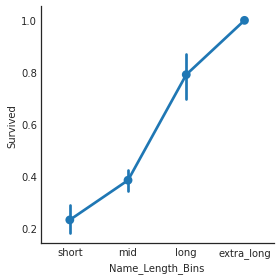

In [64]:
bins = [0, 20, 40, 57, 85]
group_names = ['short', 'mid', 'long', 'extra_long']
train['Name_Length_Bins'] = pd.cut(train['Name_Length'], bins, labels=group_names)
test['Name_Length_Bins'] = pd.cut(test['Name_Length'], bins, labels=group_names)

sns.factorplot(x="Name_Length_Bins", y="Survived", data=train)
print(train["Name_Length_Bins"].unique())

In [65]:
train.drop(['Name_Length'],axis=1,inplace=True)
test.drop(['Name_Length'],axis=1,inplace=True)

### 3.6 Data Scaling

In [66]:
from sklearn.preprocessing import scale

# Age and Fare in different scales
cols = ['Age','Fare']

for col in cols:
    train[cols] = scale(train[cols])
    test[cols] = scale(test[cols])

### 3.7 Convert Categorical Data into Numerical Values

In [67]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# convert the age bins into numerical value
labelEnc=LabelEncoder()

cat_vars=['Name_Length_Bins']
for col in cat_vars:
    train[col]=labelEnc.fit_transform(train[col])
    test[col]=labelEnc.fit_transform(test[col])

In [68]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Family,Title,Name_Length_Bins
0,0,3,male,-0.527731,-0.502445,Southhampton,G,1,Mr,2
1,1,1,female,0.564536,0.786845,Cherbourg,C,1,Mrs,1
2,1,3,female,-0.254664,-0.488854,Southhampton,G,0,Miss,2
3,1,1,female,0.359736,0.420730,Southhampton,C,1,Mrs,1
4,0,3,male,0.359736,-0.486337,Southhampton,G,0,Mr,2


In [69]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Family,Title,Name_Length_Bins
0,3,male,0.350360,-0.497079,Queenstown,G,0,Mr,3
1,3,female,1.242010,-0.511942,Southhampton,G,1,Mrs,2
2,2,male,2.311990,-0.463770,Queenstown,D,0,Mr,2
3,3,male,-0.184631,-0.482143,Southhampton,G,0,Mr,3
4,3,female,-0.541291,-0.417167,Southhampton,G,1,Mrs,1


### 3.8 Create Dummy Variables 

In [70]:
def preprocess_features(data):
    # convert categorical variables into numerical      
    
    output = pd.DataFrame(index = data.index)
   
    for col, col_data in data.iteritems():        
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)      
        output = output.join(col_data)
    
    return output

In [71]:
train = preprocess_features(train)
test = preprocess_features(test)

In [66]:
list(train)

['Survived',
 'Pclass',
 'Sex_female',
 'Sex_male',
 'Age',
 'Fare',
 'Embarked_Cherbourg',
 'Embarked_Queenstown',
 'Embarked_Southhampton',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_T',
 'Family',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare Title',
 'Name_Length_Bins']

In [67]:
list(test)

['Pclass',
 'Sex_female',
 'Sex_male',
 'Age',
 'Fare',
 'Embarked_Cherbourg',
 'Embarked_Queenstown',
 'Embarked_Southhampton',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Family',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare Title',
 'Name_Length_Bins']

In [72]:
# There is no Deck_T in test data
# So we'll not use that feature in trianing
train.drop(['Deck_T'],axis=1,inplace=True)

In [73]:
train.head()

,Survived,Pclass,Sex_female,Sex_male,Age,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southhampton,Deck_A,...,Deck_E,Deck_F,Deck_G,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare Title,Name_Length_Bins
0,0,3,0,1,-0.527731,-0.502445,0,0,1,0,...,0,0,1,1,0,0,1,0,0,2
1,1,1,1,0,0.564536,0.786845,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,1,3,1,0,-0.254664,-0.488854,0,0,1,0,...,0,0,1,0,0,1,0,0,0,2
3,1,1,1,0,0.359736,0.420730,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,0,3,0,1,0.359736,-0.486337,0,0,1,0,...,0,0,1,0,0,0,1,0,0,2


In [74]:
test.head()

,Pclass,Sex_female,Sex_male,Age,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southhampton,Deck_A,Deck_B,...,Deck_E,Deck_F,Deck_G,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare Title,Name_Length_Bins
0,3,0,1,0.350360,-0.497079,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,3
1,3,1,0,1.242010,-0.511942,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,2
2,2,0,1,2.311990,-0.463770,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,3,0,1,-0.184631,-0.482143,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,3
4,3,1,0,-0.541291,-0.417167,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,1


### 4.0 Prediction

 ### 4.1 Load Modules for Prediction 

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, classification_report

### 4.2 Split Data into Training and Testing

In [76]:
X = train.drop(['Survived'],1)
y = train['Survived']


# use the survival_ratio_in_train for the split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=survival_ratio_in_train,
                                                    stratify = y
                                                   )

### 4.3 Create the Estimators and the Pipeline

RandomForest, Logistic Regression, and Ada Boost classifiers are used for the pipeline. Trade off was made between 
selecting few classifiers and tuning greater amount of hyperparameters Vs selecting many classifiers and tuning a smaller amount of hyperparameters with avaliable computing resources.

In [77]:
nestedCV = KFold(n_splits=10, shuffle=True)

estimators = [('rForest',RandomForestClassifier()),
        ('logR', LogisticRegression()),
        ('ada', AdaBoostClassifier())]

pipe = Pipeline(estimators)

# These are the classfiers that will be used for the prediction

pipe.named_steps['rForest'], pipe.named_steps["logR"], pipe.named_steps["ada"]

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=1.0, n_estimators=50, random_state=None))

In [79]:
seed = 4 # for reproducibility

### 4.4 Set the Parameter Grid for Hyperparameter Tuning 

Model parameters were tuned using GridSearch to find the best classifier and it's hyperparameters.

In [80]:
# set parameters to do a parameters sweep for the classifiers

param_grid = dict(rForest__n_estimators=[5,10,25,50], # of DTrees
                  rForest__max_features=[3,5,7,10],
                  rForest__class_weight=["balanced"],
                  rForest__random_state=[seed],
                  logR__penalty=["l2"], # norm selection
                  logR__class_weight=['balanced'],   
                  logR__random_state=[seed],                 
                  ada__algorithm=["SAMME"],
                  ada__n_estimators=[25,50,100,250,350,500],
                  ada__learning_rate=[0.01,0.1,0.25],
                  ada__random_state=[seed])

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nestedCV)

### 4.5 Fit the Data to Models in the Pipeline

In [82]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
grid_search = grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'ada__algorithm': 'SAMME', 'ada__learning_rate': 0.1, 'ada__n_estimators': 350, 'ada__random_state': 4, 'logR__class_weight': 'balanced', 'logR__penalty': 'l2', 'logR__random_state': 4, 'rForest__class_weight': 'balanced', 'rForest__max_features': 3, 'rForest__n_estimators': 5, 'rForest__random_state': 4}


### 4.6 Best Estimator and Hyperparameters

Grid Search best estimator was Random Forest witht following hyperparameters.

In [84]:
clf = grid_search.best_estimator_
print(clf)

Pipeline(steps=[('rForest', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n...rithm='SAMME', base_estimator=None, learning_rate=0.1,
          n_estimators=350, random_state=4))])


### 4.7 Prediction for Validation

In [85]:
y_pred = clf.predict(x_test)

In [86]:
predicted_f1 = f1_score(y_test, y_pred)
print("Final Evaluation score : ", predicted_f1)

acc = sum(y_test == y_pred) / float(len(y_pred))
print("Accuracy score: ", acc)

rec = recall_score(y_test,y_pred)
print("Recall score: ", rec)

pre = precision_score(y_test,y_pred)
print("Precision score: ", pre)

print("Grid search best score: ", grid_search.best_score_)

Final Evaluation score :  0.717557251908
Accuracy score:  0.783625730994
Recall score:  0.717557251908
Precision score:  0.717557251908
Grid search best score:  0.795992714026


In [87]:
print(classification_report(y_test, y_pred, target_names=["Not Survived", "Survived"]))

              precision    recall  f1-score   support

Not Survived       0.82      0.82      0.82       211
    Survived       0.72      0.72      0.72       131

 avg / total       0.78      0.78      0.78       342



### 4.8 Nested Score with Cross Validation

Classification metrics were evaluvated using nested corss validation. 
following scoring functions are used because it's a binary classification:

ROC_AUC = Area Under the Curve from prediction scores

F1 Score = weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 

In [88]:
# computed the nested score with auc
nested_score_auc = cross_val_score(clf, X, y, cv=nestedCV, n_jobs=-1, scoring="roc_auc")
print("Cross Validation Accuracy in AUC: %0.2f (+/- %0.2f)" % (nested_score_auc.mean(), nested_score_auc.std() * 2))

# compute the nested score with f1_weight
nested_score_f1 = cross_val_score(clf, X, y, cv=nestedCV, n_jobs=-1, scoring="f1_weighted")
print("Corss Validation Accuracy in F1 score: %0.2f (+/- %0.2f)" % (nested_score_f1.mean(), nested_score_f1.std() * 2))

Cross Validation Accuracy in AUC: 0.82 (+/- 0.10)
Corss Validation Accuracy in F1 score: 0.79 (+/- 0.06)


Nested cross validation score is computed by spliting the data into testing and training k times (Kfold) and validating. To compute the above scores I used 10 folds. In K-fold cross validation the data is divided into k subsets and holdout method repeated k times. After that, the average error across all k trials are computed. By using this method every data point will get to be in the test set once and to be in the training k-1. The benefit of K-fold cross validation is that we can get a better understanding of how data behaves when it saw unseen data. 

The final evaluation score is ignoring a portion of the dataset. We trained the model only using a subset of the test data and evaluate using the remaining set. We didn't properly utilize the test data set properly. This could result in underfit and would give lower accuracy scores. 

As we can see the final evaluation score for the model is 0.7 but the cross validation score is 0.8. Therefore, by using cross validation we can build a general model. 

### 4.9 Precision - Recall Curve

In [89]:
y_pred_grid = clf.predict_proba(x_test)[:, 1]
fpr_grid_lm, tpr_grid_lm, _ = roc_curve(y_test, y_pred_grid)

rForest = RandomForestClassifier()
rForest.fit(x_train, y_train)
y_pred_rForest = rForest.predict_proba(x_test)[:,1]
fpr_rForest_lm, tpr_rForest_lm, _ = roc_curve(y_test, y_pred_rForest)

logR = LogisticRegression()
logR.fit(x_train,y_train)
y_pred_logR = logR.predict_proba(x_test)[:,1]
fpr_logR_lm, tpr_logR_lm, _ = roc_curve(y_test, y_pred_logR)

ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred_ada = ada.predict_proba(x_test)[:,1]
fpr_ada_lm, tpr_ada_lm, _ = roc_curve(y_test, y_pred_ada)


Final Evaluation including precision - recall curve

Precision and Recall curve generated using the tuned model and other classifiers used in the grid search but hyperparameters set to default values. By doing this we can compare the optimized model against default models.

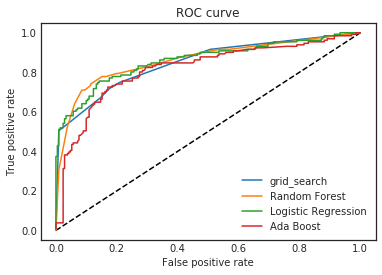

In [90]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_grid_lm, tpr_grid_lm, label='grid_search')
plt.plot(fpr_rForest_lm, tpr_rForest_lm, label='Random Forest')
plt.plot(fpr_logR_lm, tpr_logR_lm, label='Logistic Regression')
plt.plot(fpr_ada_lm, tpr_ada_lm, label='Ada Boost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

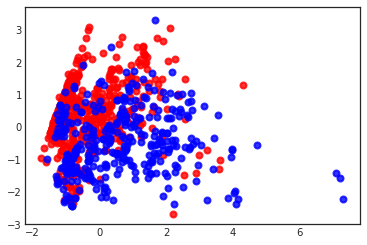

In [94]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

colors = ['red', 'blue']
target_names = ["Survived", "Not Survived"]
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

In [111]:
print(pca.explained_variance_)

[ 1.68552768  1.10175856]


In [97]:
final_predictions = clf.predict(test)

test1 = pd.read_csv("./Data/test.csv")

final_predictions = final_predictions.astype(int)
submission = pd.DataFrame({
        "PassengerId": test1["PassengerId"],
        "Survived": final_predictions
    })

submission.to_csv("./Data/final_submission.csv", index=False)